In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

# 01 - Problem (case study)
### Lets check the data, what type it is, the shape, before we start doing any data cleaning on it 
### Our goal is to see if we can determine Y (Total Claim Amount) from our X (Independet Variables or Features)!
### Some things we can look at first is the shape of the data

# 02 - Getting Data


In [2]:
df = pd.read_csv('C:/Users/mauri/Documents/Important IH Files/lab-customer-analysis-final-round/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [3]:
list(df.head())

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [4]:
df.shape #9134 Rows, 24 Features

(9134, 24)

In [5]:
df_dt = pd.DataFrame(df.dtypes) # All Data Types seem to match what they are descibing. For now, lets do a values count and see if our objects ha

In [6]:
df_dt.rename(columns = {0:"Type"}, inplace = True)

In [7]:
df_dt['Type'].value_counts() # Lets us see how many type of each object we have

object     16
int64       6
float64     2
Name: Type, dtype: int64

In [8]:
for column in df:
    if df[column].dtype == 'O': #if the column is of data type <'O'>, meaning object.There are other combos we can do with <'float64'>,<'int64'>,<'O'>. Are they're others
        print(df[column].value_counts())
# Get rid of 'Customer','Effective To Date'
# Right now we are just peeking at the data, so far everything looks ok. No Nans, but we will take care of that for sure in our next steps

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11   

In [9]:
df['Vehicle Size'].dtype == 'O' #YYOOYOYOYOYOYOYOYOYOY LOL I love booleans lol

True

In [10]:
#Lets Drop the 'Customer','Effective To Date' columns, they don't serve us any insight
#'Customer' is just a label, and up till this point, we can't use dates for insight (at least not yet)
df.drop(['Customer','Effective To Date'], inplace = True, axis = 1)


In [11]:
print('Customer' in list(df.columns))
print('Effective To Date' in list(df.columns))

False
False


### 03 - Cleaning/Wrangling/EDA
### Change headers names. No need 
### Deal with NaN values. No need....lol
### Dealing with Duplicates Done
### Categorical Features.
### Numerical Features.
### Exploration

In [12]:
type(df['State']) #Hmmm its a series, <isnan()> wont work :/

pandas.core.series.Series

In [13]:
# Deal with NaN values. Thank god, they're are none 😅. Refer to notes on how to deal with this if it happens
df.isnull().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [14]:
df.duplicated().value_counts() #As indicated by the code, we have 163 duplicates. Just wanted to check

False    8971
True      163
dtype: int64

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.shape[0]-df.drop_duplicates().shape[0] #In class

0

# EDA (Exploratory Data Analysis) 
### Lets take a look at some Stats! 
### Lets handle outliers!

In [17]:
df_num_stat = df.describe().T

In [18]:
df_num_stat

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,8971.0,8004.192319,6867.941039,1898.007675,3999.49770,5792.439588,8954.637109,83325.381190
Income,8971.0,37644.828113,30431.741597,0.000000,0.00000,33947.000000,62365.500000,99981.000000
Monthly Premium Auto,8971.0,93.192621,34.358960,61.000000,68.00000,83.000000,109.000000,298.000000
Months Since Last Claim,8971.0,15.099209,10.077668,0.000000,6.00000,14.000000,23.000000,35.000000
Months Since Policy Inception,8971.0,48.054175,27.916442,0.000000,24.00000,48.000000,71.000000,99.000000
Number of Open Complaints,8971.0,0.385241,0.909666,0.000000,0.00000,0.000000,0.000000,5.000000
Number of Policies,8971.0,2.970349,2.391832,1.000000,1.00000,2.000000,4.000000,9.000000
Total Claim Amount,8971.0,433.886437,291.074428,0.099007,270.47269,383.442328,547.988754,2893.239678


In [19]:
df_num_stat['IQR'] = df_num_stat['75%']-df_num_stat['25%']

In [20]:
df_num_stat

,count,mean,std,min,25%,50%,75%,max,IQR
Customer Lifetime Value,8971.0,8004.192319,6867.941039,1898.007675,3999.49770,5792.439588,8954.637109,83325.381190,4955.139409
Income,8971.0,37644.828113,30431.741597,0.000000,0.00000,33947.000000,62365.500000,99981.000000,62365.500000
Monthly Premium Auto,8971.0,93.192621,34.358960,61.000000,68.00000,83.000000,109.000000,298.000000,41.000000
Months Since Last Claim,8971.0,15.099209,10.077668,0.000000,6.00000,14.000000,23.000000,35.000000,17.000000
Months Since Policy Inception,8971.0,48.054175,27.916442,0.000000,24.00000,48.000000,71.000000,99.000000,47.000000
Number of Open Complaints,8971.0,0.385241,0.909666,0.000000,0.00000,0.000000,0.000000,5.000000,0.000000
Number of Policies,8971.0,2.970349,2.391832,1.000000,1.00000,2.000000,4.000000,9.000000,3.000000
Total Claim Amount,8971.0,433.886437,291.074428,0.099007,270.47269,383.442328,547.988754,2893.239678,277.516064


In [21]:
df_num_stat['upper_limit'] = df_num_stat['75%'] +1.5*df_num_stat['IQR']
df_num_stat['lower_limit'] = df_num_stat['25%'] -1.5*df_num_stat['IQR']

In [22]:
df_num_stat

,count,mean,std,min,25%,50%,75%,max,IQR,upper_limit,lower_limit
Customer Lifetime Value,8971.0,8004.192319,6867.941039,1898.007675,3999.49770,5792.439588,8954.637109,83325.381190,4955.139409,16387.346224,-3433.211414
Income,8971.0,37644.828113,30431.741597,0.000000,0.00000,33947.000000,62365.500000,99981.000000,62365.500000,155913.750000,-93548.250000
Monthly Premium Auto,8971.0,93.192621,34.358960,61.000000,68.00000,83.000000,109.000000,298.000000,41.000000,170.500000,6.500000
Months Since Last Claim,8971.0,15.099209,10.077668,0.000000,6.00000,14.000000,23.000000,35.000000,17.000000,48.500000,-19.500000
Months Since Policy Inception,8971.0,48.054175,27.916442,0.000000,24.00000,48.000000,71.000000,99.000000,47.000000,141.500000,-46.500000
Number of Open Complaints,8971.0,0.385241,0.909666,0.000000,0.00000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
Number of Policies,8971.0,2.970349,2.391832,1.000000,1.00000,2.000000,4.000000,9.000000,3.000000,8.500000,-3.500000
Total Claim Amount,8971.0,433.886437,291.074428,0.099007,270.47269,383.442328,547.988754,2893.239678,277.516064,964.262851,-145.801407


In [23]:
df_num = df.select_dtypes(include = np.number)

In [24]:
#HMMMMMMMMMM check documentation. it warns this will return all object data type columns...why warn me if thats what we want.
df_cate = df.select_dtypes(include = 'object') 

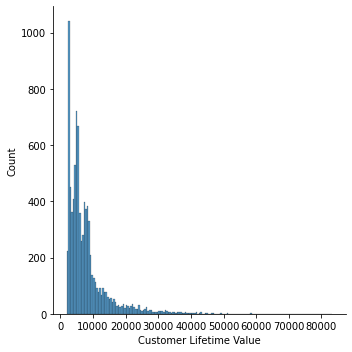

In [25]:
sns.displot(df['Customer Lifetime Value']) 


### Outlier Cleaning for Customer Lifetime Value

We lost this many data points:
802


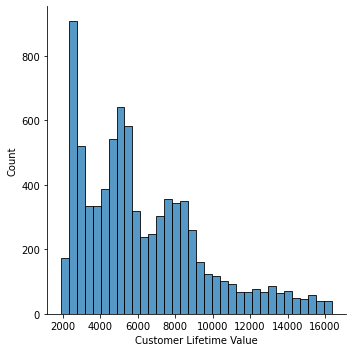

In [26]:
iqr_clv = np.percentile(df['Customer Lifetime Value'],75) - np.percentile(df['Customer Lifetime Value'],25)

ul_clv = np.percentile(df['Customer Lifetime Value'],75) + 1.5*iqr_clv
ll_clv = np.percentile(df['Customer Lifetime Value'],25) - 1.5*iqr_clv

df_clv_chop =df[(df['Customer Lifetime Value'] > ll_clv) & (df['Customer Lifetime Value'] < ul_clv)]

print('We lost this many data points:')
print(df['Customer Lifetime Value'].shape[0] - df_clv_chop['Customer Lifetime Value'].shape[0]) # Data we lost for Customer Lifetime Value

df = df_clv_chop

sns.displot(df_clv_chop['Customer Lifetime Value']) 
plt.show()# We gotta chop of some outliers

### Outlier Cleaning for Income


We have lost this many data points
0


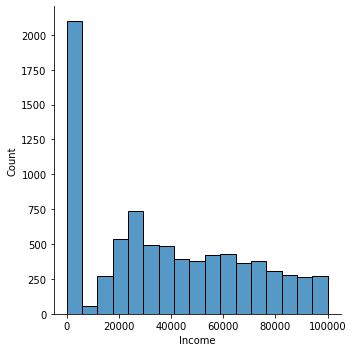

In [27]:
iqr_i = np.percentile(df['Income'],75) - np.percentile(df['Income'],25)
ul_i = np.percentile(df['Income'],75) + 1.5*iqr_i
ll_i = np.percentile(df['Income'],25) - 1.5*iqr_i

df_i_chop =df[(df['Income'] > ll_i) & (df['Income'] < ul_i)]


print('We have lost this many data points')
print(df['Income'].shape[0] - df_i_chop['Income'].shape[0]) # Data we lost for Income

df = df_i_chop #Reset our old data without outliers

sns.displot(df['Income'])
plt.show()

### Outlier Cleaning for Monthly Premium Auto	


We have lost this many data points
296


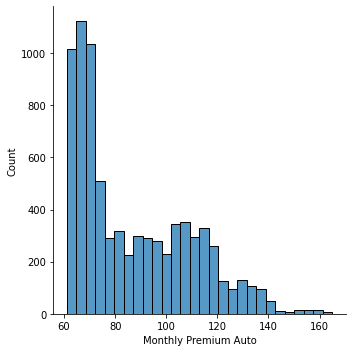

In [28]:
iqr_mpa = np.percentile(df['Monthly Premium Auto'],75) - np.percentile(df['Monthly Premium Auto'],25)
ul_mpa = np.percentile(df['Monthly Premium Auto'],75) + 1.5*iqr_mpa
ll_mpa = np.percentile(df['Monthly Premium Auto'],25) - 1.5*iqr_mpa

df_mpa_chop =df[(df['Monthly Premium Auto'] > ll_mpa) & (df['Monthly Premium Auto'] < ul_mpa)]

print('We have lost this many data points')
print(df['Monthly Premium Auto'].shape[0] - df_mpa_chop['Monthly Premium Auto'].shape[0]) # Data we lost for Income

df = df_mpa_chop #Reset our old data without outliers



sns.displot(df_mpa_chop['Monthly Premium Auto'])
plt.show()

### Outlier Cleaning for Months Since Last Claim	


We lost this many data points:
0


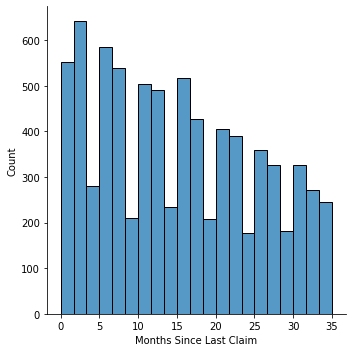

In [29]:
iqr_mslc = np.percentile(df['Months Since Last Claim'],75) - np.percentile(df['Months Since Last Claim'],25)

ul_mslc = np.percentile(df['Months Since Last Claim'],75) + 1.5*iqr_mslc
ll_mslc = np.percentile(df['Months Since Last Claim'],25) - 1.5*iqr_mslc

df_mslc_chop =df[(df['Months Since Last Claim'] > ll_mslc) & (df['Months Since Last Claim'] < ul_mslc)]


print('We lost this many data points:')
print(df['Months Since Last Claim'].shape[0] - df_mslc_chop['Months Since Last Claim'].shape[0]) # Data we lost for Customer Lifetime Value

df = df_mslc_chop #Reset our old data without outliers


sns.displot(df_mslc_chop['Months Since Last Claim']) 
plt.show()# We gotta chop of some outliers

### Outlier Cleaning for Months Since Policy Inception	


We lost this many data points:
0


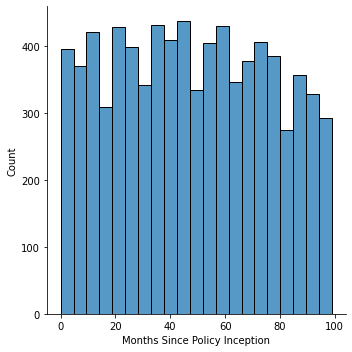

In [30]:
iqr_mspi = np.percentile(df['Months Since Policy Inception'],75) - np.percentile(df['Months Since Policy Inception'],25)

ul_mspi = np.percentile(df['Months Since Policy Inception'],75) + 1.5*iqr_mspi
ll_mspi = np.percentile(df['Months Since Policy Inception'],25) - 1.5*iqr_mspi

df_mspi_chop =df[(df['Months Since Policy Inception'] > ll_mspi) & (df['Months Since Policy Inception'] < ul_mspi)]


print('We lost this many data points:')
print(df['Months Since Policy Inception'].shape[0] - df_mspi_chop['Months Since Policy Inception'].shape[0]) # Data we lost for Customer Lifetime Value

df= df_mspi_chop


sns.displot(df_mspi_chop['Months Since Policy Inception']) 
plt.show()# We gotta chop of some outliers

### Outlier Cleaning for Number of Open Complaints	


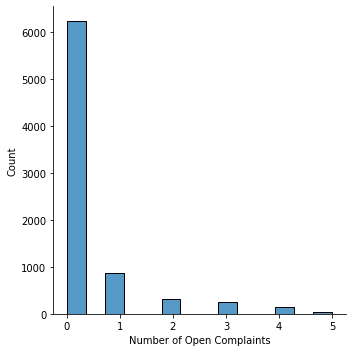

In [31]:
# Our IQR cut off everything, lets see if we even need it.
sns.displot(df['Number of Open Complaints'])

# Lets save it and ask Himanshu
# Categorical Data
iqr_nooc = np.percentile(df['Number of Open Complaints'],75) - np.percentile(df['Number of Open Complaints'],25)

ul_nooc = np.percentile(df['Number of Open Complaints'],75) + 3*iqr_nooc
ll_nooc = np.percentile(df['Number of Open Complaints'],25) - 3*iqr_nooc

df_nooc_chop =df[(df['Number of Open Complaints'] > ll_nooc) & (df['Number of Open Complaints'] < ul_nooc)]


print('We lost this many data points:')
print(df['Number of Open Complaints'].shape[0] - df_nooc_chop['Number of Open Complaints'].shape[0]) # Data we lost for Customer Lifetime Value

df['Number of Open Complaints'] = df_nooc_chop['Number of Open Complaints']


sns.displot(df_nooc_chop['Number of Open Complaints']) 
plt.show()# We gotta chop of some outliers

### Outlier Cleaning for Number of Policies	


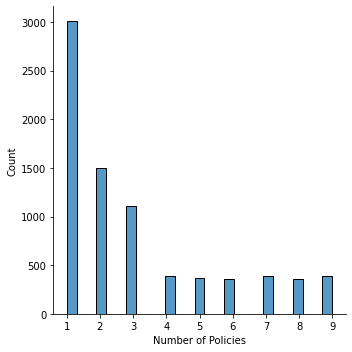

In [32]:
sns.displot(df['Number of Policies'])

# Save for later?...We can, didn't need to do it, the outliers are huge
# CATAGORICAL DATA
iqr_nop = np.percentile(df['Number of Policies'],75) - np.percentile(df['Number of Policies'],25)

ul_nop = np.percentile(df['Number of Policies'],75) + 3*iqr_nop
ll_nop = np.percentile(df['Number of Policies'],25) - 3*iqr_nop

df_nop_chop =df[(df['Number of Policies'] > ll_nop) & (df['Number of Policies'] < ul_nop)]


print('We lost this many data points:')
print(df['Number of Policies'].shape[0] - df_nop_chop['Number of Policies'].shape[0]) # Data we lost for Customer Lifetime Value

df['Number of Policies'] = df_nop_chop['Number of Policies']


sns.displot(df_nop_chop['Number of Policies']) 
plt.show()# We gotta chop of some outliers

### Outlier Cleaning for Total Claim Amount


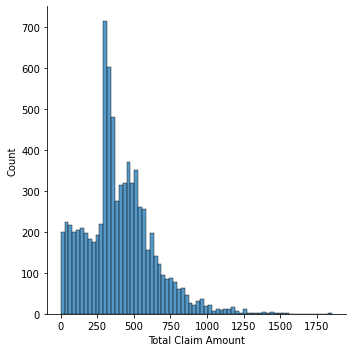

In [33]:
# The big one...
sns.displot(df['Total Claim Amount'])

# Save for later?...We can, didn't need to do it, the outliers range are huge

iqr_tca = np.percentile(df['Total Claim Amount'],75) - np.percentile(df['Total Claim Amount'],25)

ul_tca = np.percentile(df['Total Claim Amount'],75) + 2*iqr_tca
ll_tca = np.percentile(df['Total Claim Amount'],25) - 3*iqr_tca

df_tca_chop =df[(df['Total Claim Amount'] > ll_tca) & (df['Total Claim Amount'] < ul_tca)]


print('We lost this many data points:')
print(df['Total Claim Amount'].shape[0] - df_tca_chop['Total Claim Amount'].shape[0]) # Data we lost for Customer Lifetime Value

df= df_tca_chop


sns.displot(df_tca_chop['Total Claim Amount']) 
plt.show()# We gotta chop of some outliers

In [34]:
df.select_dtypes(include = 'object') 

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,California,No,Basic,College,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Small
9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


<AxesSubplot:xlabel='State', ylabel='count'>

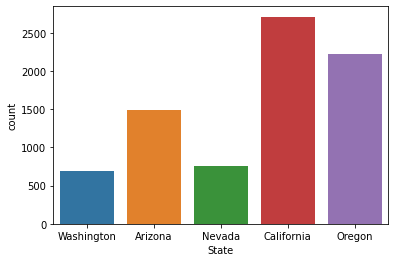

In [35]:
sns.countplot(x = 'State', data=df) # This can be done for all the categorical Data

In [36]:
corr_data = df.select_dtypes(include = np.number) 
correlations_matrix = corr_data.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.049530,0.421795,-0.017733,-0.007703,-0.034639,0.234893,0.162643
Income,0.049530,1.000000,-0.029912,-0.028276,0.001150,0.003829,-0.003851,-0.406620
Monthly Premium Auto,0.421795,-0.029912,1.000000,-0.006985,0.003262,-0.021553,-0.003927,0.486847
Months Since Last Claim,-0.017733,-0.028276,-0.006985,1.000000,-0.049993,0.007939,0.003263,-0.005008
Months Since Policy Inception,-0.007703,0.001150,0.003262,-0.049993,1.000000,0.000391,-0.013813,-0.014605
Number of Open Complaints,-0.034639,0.003829,-0.021553,0.007939,0.000391,1.000000,-0.002855,-0.016255
Number of Policies,0.234893,-0.003851,-0.003927,0.003263,-0.013813,-0.002855,1.000000,-0.004804
Total Claim Amount,0.162643,-0.406620,0.486847,-0.005008,-0.014605,-0.016255,-0.004804,1.000000


<AxesSubplot:>

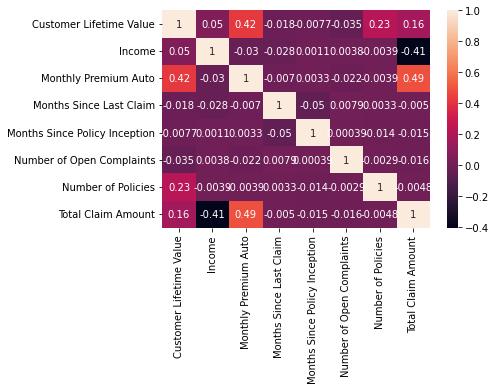

In [37]:
sns.heatmap(correlations_matrix, annot=True)


In [38]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,California,5032.165498,No,Basic,College,Employed,M,66367,Suburban,Divorced,64,6,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small
9128,California,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# Normalization.
# Encoding Categorical Data.
# Splitting into train set and test set.

In [39]:
# Split!

Y = df['Total Claim Amount']
df.drop(['Total Claim Amount'], axis = 1)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,California,5032.165498,No,Basic,College,Employed,M,66367,Suburban,Divorced,64,6,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Small
9128,California,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [40]:
X_num = df.select_dtypes(include = np.number)
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9127,5032.165498,66367,64,6,48,0,3,307.200000
9128,4100.398533,47761,104,16,58,0,1,541.282007
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [41]:
X_num.drop(['Number of Open Complaints','Number of Policies'], axis =1, inplace = True)
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9127,5032.165498,66367,64,6,48,307.200000
9128,4100.398533,47761,104,16,58,541.282007
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [42]:
X_cat = df.select_dtypes(include = 'O')
Number_of_Open_Complaints = df['Number of Open Complaints']
Number_of_Policies = df['Number of Policies']
X_cat['Number of Open Complaints'] = Number_of_Open_Complaints
X_cat['Number of Policies'] = Number_of_Policies
X_cat

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,California,No,Basic,College,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Small,0,3
9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,0,3


In [43]:
X_num.shape
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9127,5032.165498,66367,64,6,48,307.200000
9128,4100.398533,47761,104,16,58,541.282007
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [44]:
X_cat.shape

(7873, 16)

In [45]:
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
# pd.DataFrame(x_normalized)

(7873, 6)


In [46]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [47]:
X = np.concatenate((x_normalized, encoded), axis=1)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [49]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,0.233918,0.972243,0.002990,0.000206,0.000593,0.004074,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.237498,0.971272,0.003017,0.000083,0.002727,0.014480,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.092650,0.995634,0.002322,0.000277,0.000347,0.011146,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.128618,0.991685,0.001622,0.000479,0.001677,0.003499,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.169795,0.985461,0.002133,0.000183,0.001808,0.005358,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,0.082089,0.996575,0.002041,0.000396,0.000365,0.009795,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6294,0.970651,0.000000,0.032870,0.004432,0.026961,0.236664,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6295,0.342163,0.939067,0.004514,0.000000,0.001079,0.032503,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6296,0.133401,0.991055,0.000842,0.000321,0.000321,0.003682,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.834338137704062

In [51]:
mse = mean_squared_error(y_test, predictions)
print(mse)

8618.116018235312


In [52]:
rmse = math.sqrt(mse)
print(rmse)

92.83380859490421


In [53]:
r2 = r2_score(y_test, predictions)
r2

0.834338137704062

In [54]:
n = len(X_test) 
p = X_test.shape[1]

In [55]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2 # Penalty for adj_r2

0.8259333970268314

### Ignore the bottom

In [56]:
df_fun = df[['Number of Open Complaints','Total Claim Amount']]
df_mean_NOOC = df_fun.groupby(['Number of Open Complaints']).mean()
df_mean_NOOC.reset_index(inplace = True)

In [57]:
df_mean_NOOC

,Number of Open Complaints,Total Claim Amount
0,0,402.300804
1,1,383.183284
2,2,396.801211
3,3,379.657424
4,4,407.572510
5,5,393.575104


In [58]:
type(df_mean_NOOC)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Number of Open Complaints', ylabel='Total Claim Amount'>

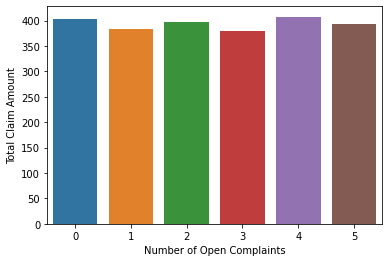

In [59]:
sns.barplot(x = "Number of Open Complaints", y = "Total Claim Amount", data=df_mean_NOOC)

In [60]:
ani = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)

In [61]:
ani

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [62]:
grouped1 = ani.groupby("class").mean()
grouped1

,max_speed
class,
bird,206.5
mammal,69.1


In [63]:
grouped2 = ani.groupby("order").mean()
grouped2

,max_speed
order,
Carnivora,69.1
Falconiformes,389.0
Primates,NaN
Psittaciformes,24.0


In [64]:
grouped3 = ani.groupby(["class", "order"]).mean()
grouped3

max_speed
class  order                    
bird   Falconiformes       389.0
       Psittaciformes       24.0
mammal Carnivora            69.1
       Primates              NaN

In [67]:
df.columns = list(map(lambda x: x.replace(' ','_'), df.columns))

In [68]:
df.columns

Index(['State', 'Customer_Lifetime_Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location_Code',
       'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')